**Name  : Arivazhagan.B**

**Title :  Student Habits & Performance Analysis**

**Email : barivazhagan8@gmail.com**

## Project Title :

****Predicting Student Exam Performance from Lifestyle and Study Habits****.

## Objective:

To build a machine learning model that predicts a student's **exam score** based on their daily habits,

health indicators,and demographic information.This can help education and policy-markers identify key 

lifedstyle factors that influence academic success.

## Dataset Summary :

* **Total Records** : 1000 students
  
* **Target Variable** : exam_score (continues,range:18.4 to 100.0)

* **Feature Categories** :

    * **Demographics** : age,gender,parental_education_level
 
    * **Lifestyle & Habits :**
 
      * Study : study_hours_per_day,attendance_percentage

      * Distractions : Social_media_hours,netflix_hours
     
      * Wellness : sleep_hours,diet_quality,excercise_frequency,mental_health_rating
     
      * Enviroment : Internet_quality,part_time_job,extracurricular_participation
      
   

## Expected Outcome :

* A predict model that estimates a student's exam score.

* Actionable insights about which daily habits improve or hinder academic performance.

* A ranked list of lifestyle factors based on their influence on performace.

## Project Steps:

**Import Libraries**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

**Load dataset**

In [3]:
df=pd.read_csv(r'C:\Users\ELCOT\Desktop\Excel Excercise\New folder\student_habits_performance.csv')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   int32  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   int32  
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   int32  
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   int32  
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   int32  
 12  internet_quality               1000 non-null   in

In [43]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Data Preprocessing**

df.isnull().sum()-It will identify the Non-null value count in each column.

In [48]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

** fillna-It is used to fill Nan-null values in our dataset **

In [71]:
df['parental_education_level'].mode()

0    High School
Name: parental_education_level, dtype: object

In [73]:
df['parental_education_level'].fillna('High School',inplace=True)

In [75]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

** LabelEncoder- It is used to categorical labels into numerical values. **

In [15]:
for col in df.select_dtypes(include="object").columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [17]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4


In [210]:
df['gender'].unique()

array([0, 1, 2])

**Exploratory Data Analysis(EDA)**

** Correlation Heatmap **

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Feature')

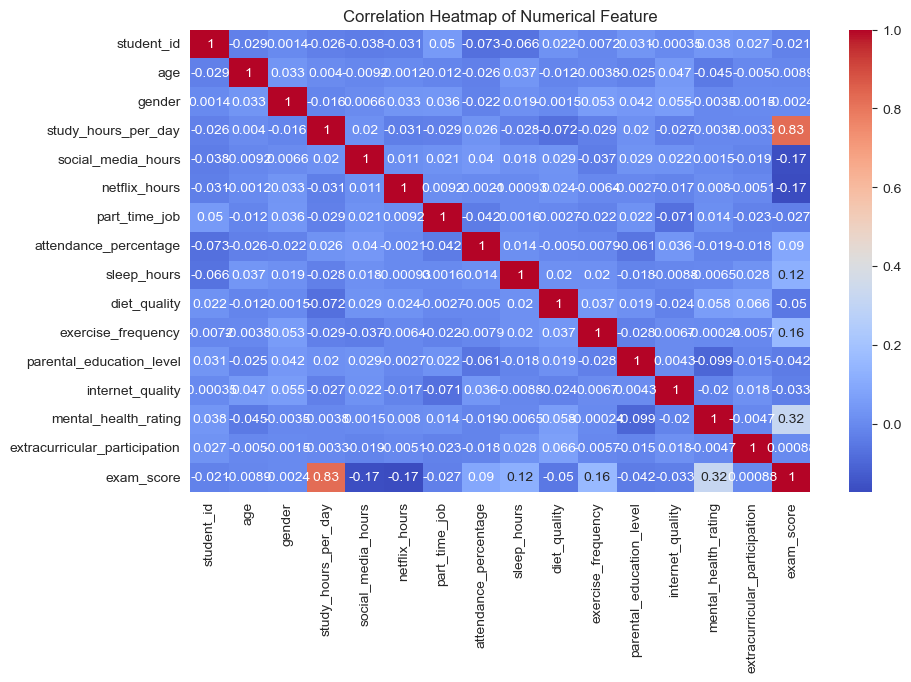

In [154]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Feature')

** Distribution plots for key vairables **

In [168]:
dist_plots=df[['study_hours_per_day','social_media_hours','sleep_hours','netflix_hours','exam_score']]
dist_plots

,study_hours_per_day,social_media_hours,sleep_hours,netflix_hours,exam_score
0,0.0,1.2,8.0,1.1,56.2
1,6.9,2.8,4.6,2.3,100.0
2,1.4,3.1,8.0,1.3,34.3
3,1.0,3.9,9.2,1.0,26.8
4,5.0,4.4,4.9,0.5,66.4
...,...,...,...,...,...
995,2.6,0.5,7.5,1.6,76.1
996,2.9,1.0,6.8,2.4,65.9
997,3.0,2.6,6.5,1.3,64.4
998,5.4,4.1,7.6,1.1,69.7


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_27156\2706885027.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


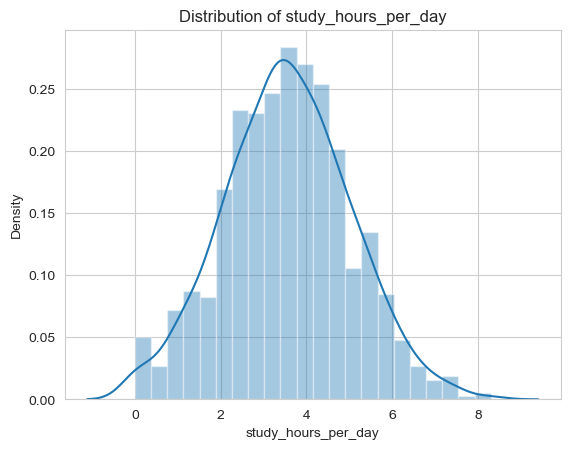

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_27156\2706885027.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


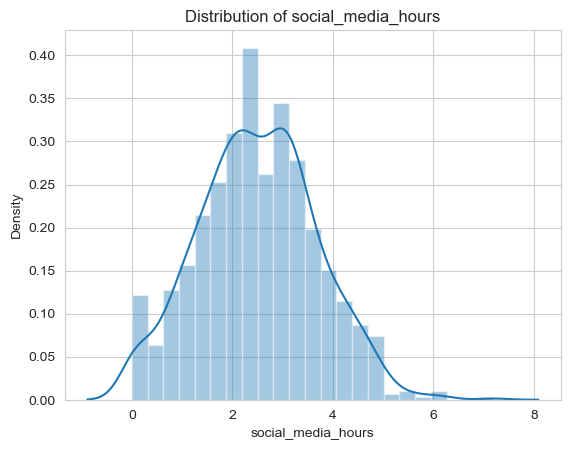

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_27156\2706885027.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


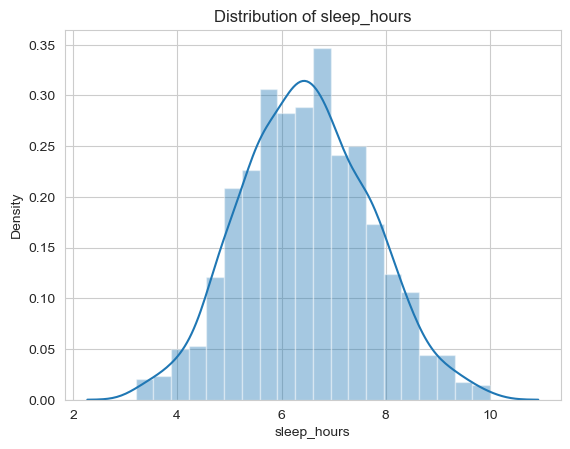

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_27156\2706885027.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


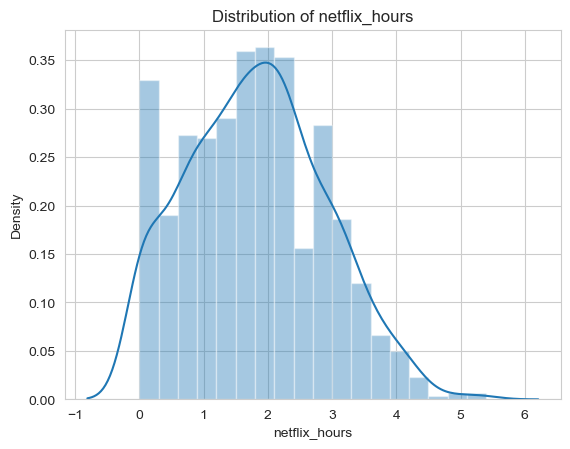

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_27156\2706885027.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


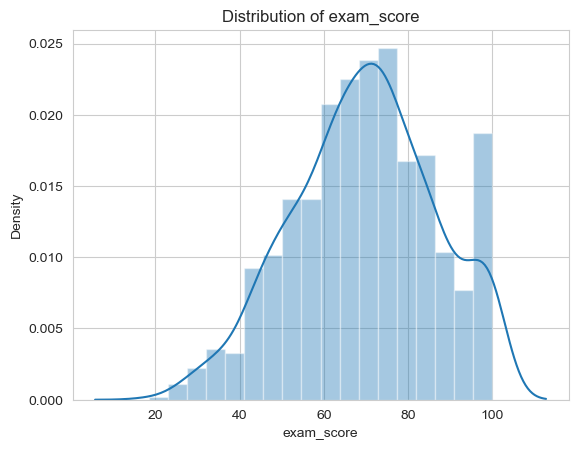

In [176]:
for column in df[['study_hours_per_day','social_media_hours','sleep_hours','netflix_hours','exam_score']]:
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

** Boxplot for Categorical features vs exam_score **

In [181]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_868\3858250278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


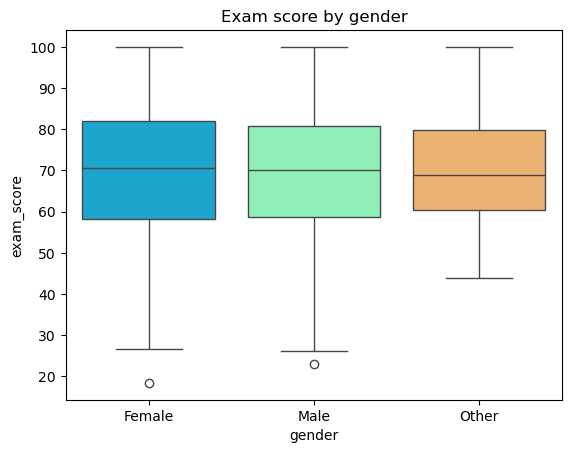

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_868\3858250278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


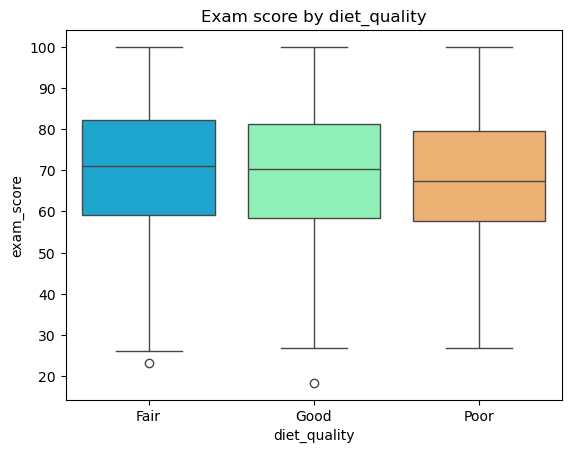

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_868\3858250278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


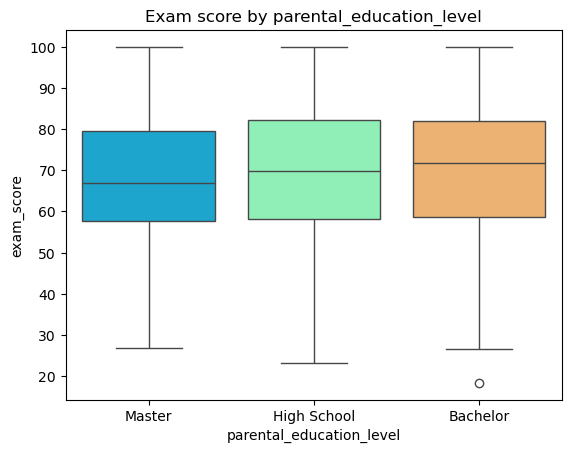

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_868\3858250278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


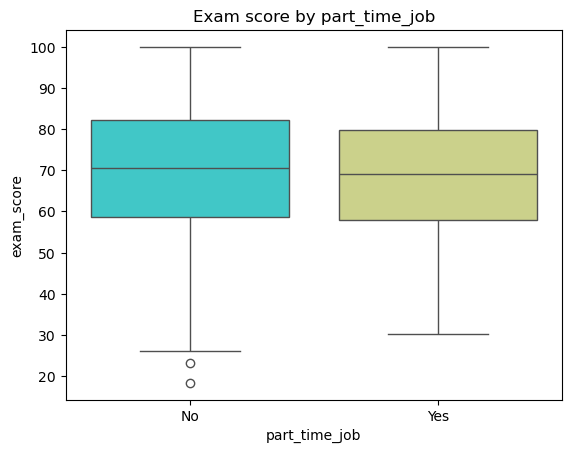

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_868\3858250278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


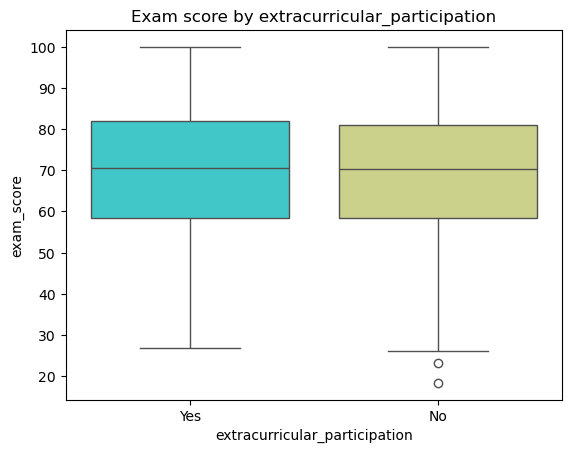

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_868\3858250278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


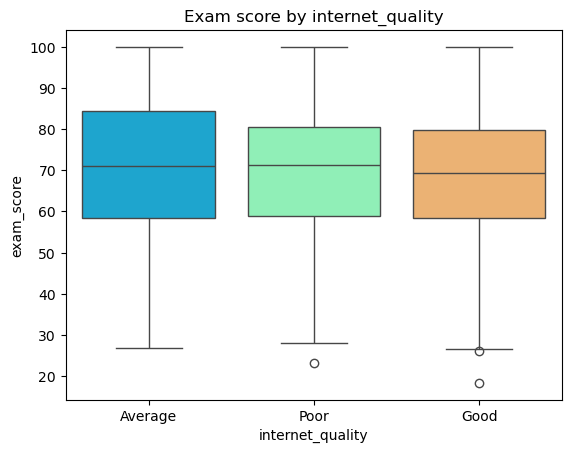

In [9]:
for column in df[['gender','diet_quality','parental_education_level','part_time_job','extracurricular_participation','internet_quality']]:
    sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')
    plt.title(f'Exam score by {column}')
    plt.show()

** Segregate data into Independent variable(x) and Dependent variable(y) **

In [94]:
x=df.drop('exam_score',axis=1)
y=df['exam_score']

** Split Data into Training and Testing ** 

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Scale the Feature**

StandardScaler-It is used to standardizes numerical values by removing the mean and scaling to unit variance

In [98]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Build and Train the Linear Model**

In [108]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [112]:
model.score(x_train_scaled,y_train)

0.9017979644271383

In [118]:
model.score(x_test_scaled,y_test)

0.89678708203641

** Make Prediction and Evaluate **

In [121]:
y_pred=model.predict(x_test_scaled)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("RMSE:",rmse)
print("MAE:",mae)
print("R^2:",r2)

RMSE: 5.14458892905211
MAE: 4.1770627660527175
R^2: 0.89678708203641


## Concolusion:

* Linear Regression gave the  best result compared to other

  models(Random Forest,SVR,MLP)

## Key Insights:

* Higher study hours and better sleep quality correlate with higher exam scores.

* Social media and Netflix usage negatively impact performance.

* Parental education and diet quality also play important roles.